In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
from sklearn.datasets import load_iris, load_boston
data = load_iris()
X = pd.DataFrame(data.data)
y = pd.Series(data.target, name='class')
df = pd.concat([X, y], axis=1)

# 1. Data Exploration

In [84]:
df.shape

(150, 5)

In [85]:
df.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
y.value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011B5D080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011DBBC18>]], dtype=object)

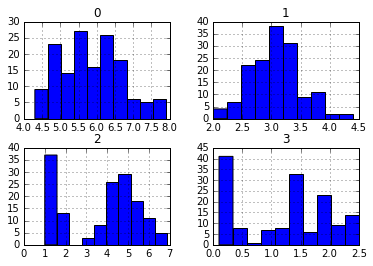

In [87]:
X.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E2DE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FAA4358>]], dtype=object)

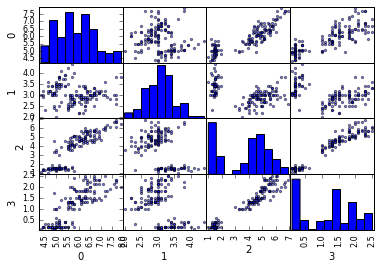

In [75]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X)

# 2. Data Preprocessing

## 2.1. Missing Values (NaN)

## Count NaN by columns

In [76]:
X.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

## Drop

In [77]:
X.loc[:, 1].fillna(method='ffill');

## Fill

In [78]:
X.dropna(how='all', thresh=4, subset=[0,1]);

## Impute

In [80]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_imputed = imr.fit_transform(df)
print type(data_imputed)

<type 'numpy.ndarray'>


## 2.2. Category Data

In [ ]:
category_mapping = {label : idx for idx, label in enumerate(np.unique(df['col1']))}
df['col1'] = df['col1'].map(category_mapping)

from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['col2'] = class_le.fit_transform(df['col2'].values)

## 2.3. Time Data

In [ ]:
df['date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.strftime('%b'))

## 2.4. Feature Sacaling : Standarize

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_norm = stdsc.fit_transform(X_train)
X_test_norm = stdsc.transform(X_test)

# 3. Set Dataset : Train, Validation, Test

In [88]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4. Apply ML

## 4.1. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 4.2. Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 4.3. kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
y_pred = clf.predict(X_test)

## 4.4. SVM

In [93]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
y_pred = clf.predict(X_test)

## 4.5. Naive Bayesian Classifier

In [95]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X_test)

## 4.6. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)
y_pred = clf.predict(X_test)

# 5. Model Evaluation

## 5.1. Accuray

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print accuracy_score(y_test, y_pred)
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30



## 5.2. Decision Boundary

## 5.3. Learning Curve

## 5.4. ROC Curve

# 6. Model Tuning

## 6.1. Hyper-parameter tuning : regularzation, degree, depth, kernel, k, etc. 

## Utils

## resample

In [ ]:
from sklearn.utils import resample
X, y = resample(X, y, n_samples=100, random_state=0)
